In [ ]:
!pip3 install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
##import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset= pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## divide the dataset intp independent and dependent feature
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
## Feature engineering

geography = pd.get_dummies(X['Geography'])  # Check for typos here
gender = pd.get_dummies(X['Gender'], drop_first=True)


In [ ]:
## Concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
#splitting the dataset into trainign set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
 # Feature Scaling
 from sklearn.preprocessing import StandardScaler
 sc=StandardScaler()
 X_train= sc.fit_transform(X_train) # we use transform to avoid Data leakage
 X_test= sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 12)

In [ ]:
# part 2 Now lets create ANN

from tensorflow.keras.models import Sequential # when we take entire dataset as a block
from tensorflow.keras.layers import Dense # when we want to create nuerons or input layers
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU # activation function(Use inside the hidden layers)
from tensorflow.keras.layers import Dropout # to prevent overfitting (Regularization)

In [ ]:
## lets initialize ANN
classifier=Sequential()

In [ ]:
## Adding the Input layer
classifier.add(Dense(units=12,activation='relu'))

In [112]:
# Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))


In [ ]:
# Adding second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
## Early stopping (when the accuracy of the model is not improving the model will automatically stop)
import tensorflow as tf
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7872 - loss: 0.4713 - val_accuracy: 0.8436 - val_loss: 0.3805
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8524 - loss: 0.3605 - val_accuracy: 0.8448 - val_loss: 0.3790
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8579 - loss: 0.3591 - val_accuracy: 0.8429 - val_loss: 0.3675
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8604 - loss: 0.3418 - val_accuracy: 0.8455 - val_loss: 0.3704
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8594 - loss: 0.3490 - val_accuracy: 0.8474 - val_loss: 0.3637
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8567 - loss: 0.3417 - val_accuracy: 0.8470 - val_loss: 0.3721
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8593 - loss: 0.3394 - val_accuracy: 0.8508 - val_loss: 0.3641
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8615 - loss: 0.3329 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

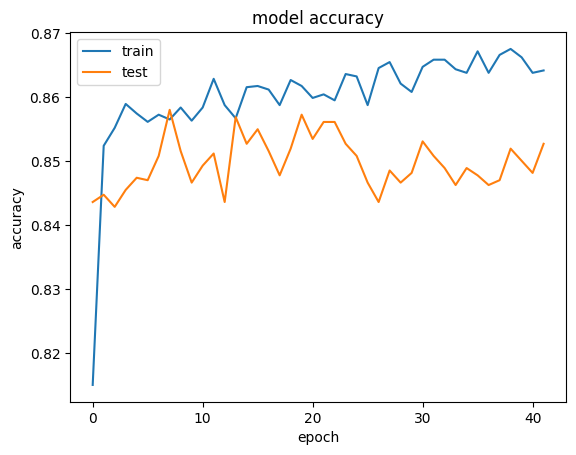

In [ ]:
#summarisze history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

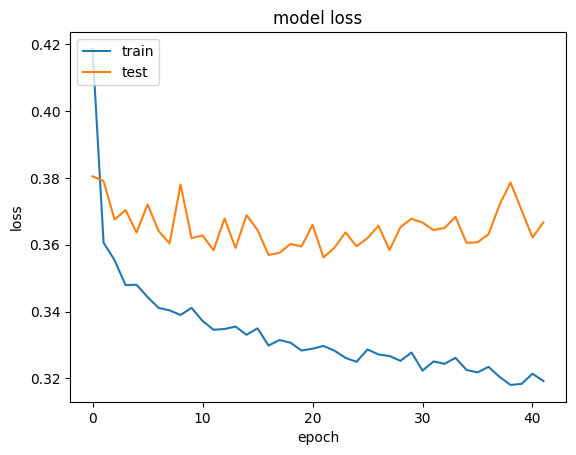

In [ ]:
# summarize history for the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
# Making the prediction and evaluating the model

# predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1541,   54],
       [ 218,  187]])

In [ ]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.864

In [ ]:
# get the weights
classifier.get_weights()

[array([[ 8.14067572e-02, -2.13942006e-01, -3.76947224e-01,
         -4.31387126e-02,  1.49527237e-01,  7.53072083e-01,
         -2.02939771e-02, -5.22217095e-01,  1.36096537e+00,
          6.45599291e-02, -5.96705973e-01, -9.60830390e-01],
        [ 7.37227082e-01, -5.63140273e-01,  3.36182070e+00,
          3.00200462e+00,  2.78052068e+00,  1.24575555e+00,
         -4.02006460e-03,  1.78661346e+00, -1.93048656e+00,
         -2.83316350e+00, -2.80841422e+00, -1.81919086e+00],
        [-1.12804510e-01,  2.75613219e-01,  1.72305882e-01,
         -1.44903672e+00, -5.17507911e-01,  1.84390354e+00,
          3.40751499e-01,  1.01639962e+00,  2.73339957e-01,
          1.88832194e-01, -7.20889091e-01,  1.05028942e-01],
        [ 8.65040779e-01, -1.24039578e+00,  6.13411427e-01,
          4.66965497e-01, -5.22666991e-01,  2.99118400e-01,
         -3.66288018e+00, -2.99589062e+00, -1.49760664e+00,
         -8.49745870e-01,  1.80384353e-01,  1.64589965e+00],
        [ 3.17951465e+00, -7.3431944